In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold,cross_validate, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
#from yellowbrick.classifier import ClassificationReport
import warnings
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings("ignore")

In [2]:
#merging all the required datasets - metabolomics dataset, drug response dataset and the metadata of the cell lines

data = pd.read_excel("D:\\GaTech\\Fall Sem\\BIOL 8901\\Metabolomic Project\\metabolomic_data.xlsx", sheet_name="1-clean data")
data.rename(columns = {'Unnamed: 0': 'ID'}, inplace = True)
last_column = data.iloc[:,-1].name
sample = pd.read_csv("D:\\GaTech\\Fall Sem\\BIOL 8901\\sample_info.csv")
sample.rename(columns = {'CCLE_Name':'ID'}, inplace=True)
merged_data = data.merge(sample, on='ID')
drug = pd.read_csv('D:\\GaTech\\Fall Sem\\BIOL 8901\\sanger-dose-response.csv')
drug.rename(columns={'ARXSPAN_ID':'DepMap_ID'}, inplace = True)
working_data = merged_data.merge(drug, on='DepMap_ID')

In [3]:
#since our data has a lot of NaN's in them, we can fill them using 0 (for now, just for a workaround)

working_data.fillna(0, inplace=True)

In [4]:
X1 = working_data.loc[working_data['DRUG_NAME'] == 'CISPLATIN']

In [5]:
'''
reset the index as once we take a subset of the main working_dataset, the indexes will get mixed up.
thus the indices need to be reset before we start working on the model
'''

X1.reset_index(inplace=True)

In [6]:
#wherever there is any duplicate within a cell line's IC50 values, take the cell line that originates from the GDSC2 phase 
X_ = X1[~X1.duplicated(['DepMap_ID'], keep=False) | X1['DATASET'].eq('GDSC2')]

In [7]:
X_.reset_index(inplace=True)

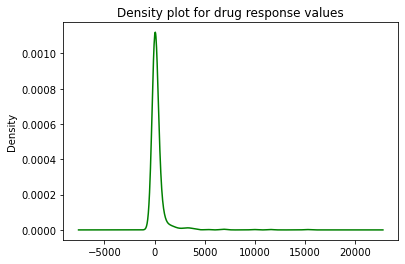

In [11]:
X_.IC50_PUBLISHED.plot.density(color='green')
plt.title('Density plot for drug response values')
plt.show()

In [12]:
X_.IC50_PUBLISHED.mean()

300.4605618460755

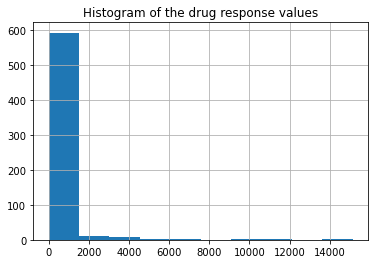

In [15]:
X_.hist(column = 'IC50_PUBLISHED')
plt.title('Histogram of the drug response values')
plt.show()

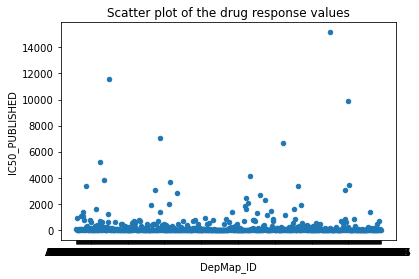

In [18]:
X_.plot.scatter(x='DepMap_ID', y='IC50_PUBLISHED')
plt.title('Scatter plot of the drug response values')
plt.show()

In [23]:
max(list(X_.IC50_PUBLISHED)), min(list(X_.IC50_PUBLISHED)), sum(list(X_.IC50_PUBLISHED))/len(list(X_.IC50_PUBLISHED))

(15153.593840489615, 0.2087428849299406, 300.4605618460755)